# Bay Wheels Data Exploration
## by Yu Okamura

## Preliminary Wrangling

> This document explores a dataset obtained from the bike-sharing system Bay Wheels (formally Ford GoBike).  The area covers the greater San Francisco Bay area includes the detail of individual bike rides made during 2019. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import glob
import os
from requests import get
from io import BytesIO
from zipfile import ZipFile

np.random.seed(seed=32)

In [115]:
# Obtain necessary data from Bay Wheels website

# create a folder if it does not exist
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# list of urls to monthly ride data
zip_urls = ['https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201910-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201911-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip'
           ]

# download zip files, unzip and save the content to data folder
for url in zip_urls:
    request = get(url)
    zip_file = ZipFile(BytesIO(request.content))
    zip_file.extractall(folder_name)
    zip_file.close

In [2]:
# list all the csv files in data folder
path = os.getcwd()
all_files = glob.glob(os.path.join(path,'data\*.csv'))

# read csv files in the list and concatnate to create one dataframe
df = pd.concat((pd.read_csv(file, 
                            dtype={"bike_share_for_all_trip":'string','rental_access_method':'string'}) for file in all_files), 
               ignore_index=True)

In [3]:
# dataframe overview
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [4]:
print(df.shape)
print(df.info(verbose=True, null_counts=True))

(2506983, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2506983 non-null  int64  
 1   start_time               2506983 non-null  object 
 2   end_time                 2506983 non-null  object 
 3   start_station_id         2426249 non-null  float64
 4   start_station_name       2426850 non-null  object 
 5   start_station_latitude   2506983 non-null  float64
 6   start_station_longitude  2506983 non-null  float64
 7   end_station_id           2424081 non-null  float64
 8   end_station_name         2424633 non-null  object 
 9   end_station_latitude     2506983 non-null  float64
 10  end_station_longitude    2506983 non-null  float64
 11  bike_id                  2506983 non-null  int64  
 12  user_type                2506983 non-null  object 
 13  bike_share_for_all_trip  226

In [5]:
# change incorrect datatypes 
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


In [7]:
# max duration second is 900000, equivalent of 250hrs.  Lets check the longest 10 durations
df.duration_sec.nlargest(10)

2481276    912110
2385537     86230
1265667     86217
644460      86114
1741971     86114
1165301     85952
2190150     85935
1172938     85904
1749276     85702
510137      85676
Name: duration_sec, dtype: int64

The 2nd to 10th longest records are all around 24hours, and the longest one is an apparent anomaly.  This entry will be excluded from the analysis.

In [8]:
df = df[df.duration_sec!=df.duration_sec.max()]

I will also add duration_min column as this is more useful metric than second

In [9]:
df['duration_min']=df.loc[:,'duration_sec'] / 60

In [10]:
# check the type of rental methods available
df.rental_access_method.unique()

array([nan, <NA>, 'app', 'clipper'], dtype=object)

In [11]:
# check when the data collection for rental_access_method had began
df[~df.rental_access_method.isnull()].start_time.min()

Timestamp('2019-06-10 11:13:10')

### What is the structure of your dataset?

> There is information on 2506983 rides made in a bike-sharing system.  There are 15 features (duration of a ride, start and end time, start and end locations (given by station id, station name, longitude and latitude), bike_id, user_type, bike_share_for_all_type and rental_access_method).

> There are three categorical features.  User-type (Subscribe or Customer), bike_share_for_all_trip(Yes or No), and rental_access_method(app or clipper).  The rental_access_method column method only has data from 10/June onwards.

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in figuring out how the time (month, day of a week, and time of a day) would affect the number of rides.  I would also like to know how the nature of the ride is changed by the time (the duration of the trip, type of customer)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I suspect that time of the year would have some impact on total usage (high during the warmer period) and this would also affect the nature of ride (more Customer and shorter trips during summer when there are many tourist or one-off customers).  Weekend and during the daytime would probably have higher rides as well. 

## Univariate Exploration


Let's start looking into the distribution of duration_min

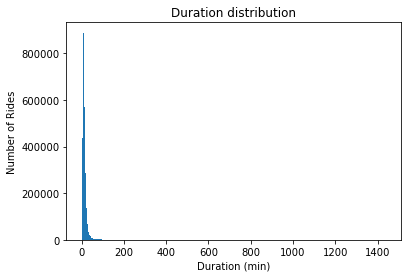

In [12]:
# univariate plot of duration
bin_size=5
bin_edges = np.arange(0,df.duration_min.max()+bin_size,bin_size)
plt.hist(data=df, x='duration_min', bins=bin_edges);

plt.title('Duration distribution')

plt.xlabel('Duration (min)')
plt.ylabel('Number of Rides');

Most data are far left of the axis, suggesting there are few outliers.  As I have already checked when excluded one anomaly data points, several rides went near 24hrs. 

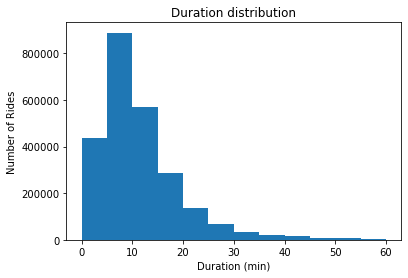

In [13]:
# focus on duration less than 1hr 
bin_edges = np.arange(0, 60+bin_size,bin_size)
plt.hist(data=df, x='duration_min', bins=bin_edges);

plt.title('Duration distribution')

plt.xlabel('Duration (min)')
plt.ylabel('Number of Rides');

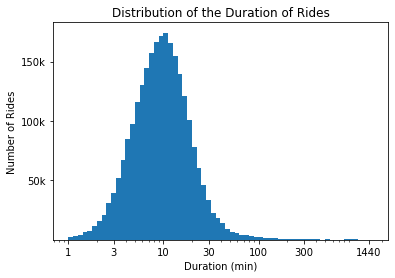

In [14]:
# The distribution is right skewed.  Apply log transformation
bin_size = 0.05
bin_edges = 10** np.arange(0,np.log10(df.duration_min.max())+ bin_size, bin_size)
plt.hist(data=df, x='duration_min', bins=bin_edges);

plt.title('Distribution of the Duration of Rides')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Rides')

tick_loc = [1,3,10,30,100,300,1440]
plt.xscale('log')
plt.xticks(tick_loc,tick_loc)
plt.yticks([5e4, 1e5, 1.5e5],['50k','100k','150k']);

1st plot - Duration has a long-tail distribution.  Only a few cases where duration goes more than 60min and the majority of rides are less than 60min.  
2nd plot - Focusing on those rides less than 60min, the distribution has a long-tail with a higher concentration on the lower end (<15min).
3rd plot - 2nd plot on the log-scale.  It shows the normal distribution with most counts falling in between 3 to 30 min range. 

Now let's check how usage changes depending on the time.  I will group the data into each month, day of the week, and hour.

In [15]:
# add new column to the table
df['month']=df.loc[:,'start_time'].dt.month
df['day_of_week']=df.loc[:,'start_time'].dt.day_name()
df['hour'] = df.loc[:,'start_time'].dt.hour


In [16]:
# convert day_of_week and user_type into ordered categorical types
ordinal_var_dict = {'day_of_week': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                    'user_type':['Subscriber', 'Customer']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

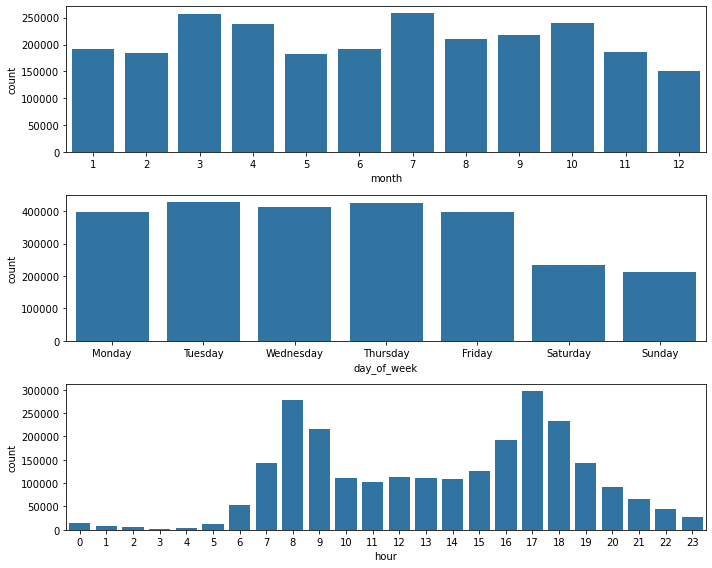

In [17]:
# compare how the number of rides changes depending on the time
base_color = sns.color_palette()[0]
fig, ax = plt.subplots(nrows=3, figsize=(10,8))

sns.countplot(data=df, x='month', color=base_color, ax=ax[0])
sns.countplot(data=df, x='day_of_week', color=base_color,ax=ax[1])
sns.countplot(data=df, x='hour', color=base_color,ax=ax[2])

fig.subplots_adjust(hspace=1)
plt.tight_layout()
plt.show()

The immediately noticeable pattern in the above plot is that the usage goes down during weekend (opposite of what I have initially predicted).  The usage is the highest at around 8 in the morning and 17 in the afternoon.  This probably suggests the high proportion of usage comes from commuters.  Monthly change is a bit harder to find a pattern, it seems there are three peaks around March, July and October.

Lastly, let's look at the proportion of user demographic.

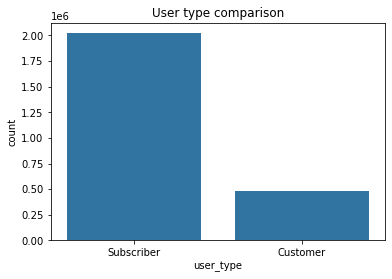

In [18]:
sns.countplot(data=df, x='user_type', color=base_color)

plt.title('User type comparison');

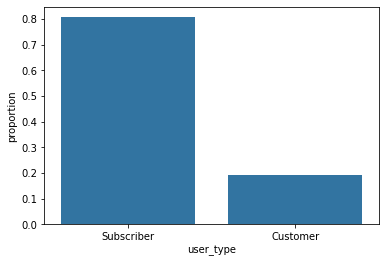

In [19]:
# plot in proportion
n_points = df.shape[0]
max_count = df['user_type'].value_counts().max()
max_prop = max_count/n_points

tick_props = np.arange(0,max_prop,0.1)
tick_names = ['{:0.1f}'.format(v) for v in tick_props]
sns.countplot(data=df, x='user_type', color=base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion');


80% of app users are subscribers.  It does align with the previous observation that the majority of users might be using the ride for commuting.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration variable has a long tail, though most of the count centred around 15min.  With log scaling, the distribution becomes normally distributed.  There was one unusual point (duration of almost 250hrs), but this was eliminated already in the preliminary wrangling section.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I have used start_time data to create four new features, namely 'month', 'day_of_week', and 'hour'.  This helped to visualise the fractionation in the customer usage depending on the time factor. Of these, 'day_of_week' and 'hour' showed interesting features.  Former showed the decrease in the usage during the weekend, and the latter showed the bimodal distribution with peaks around 8 and 17 o'clock

## Bivariate Exploration


I will first investigate the relationship between the ride duration and the time factor

In [20]:
# sample 1% of data so taht plots render faster
samples = np.random.choice(df.shape[0], 25000, replace = False) # roughtly 1% of the total data
df_samp = df.loc[samples,:]

<Figure size 720x720 with 0 Axes>

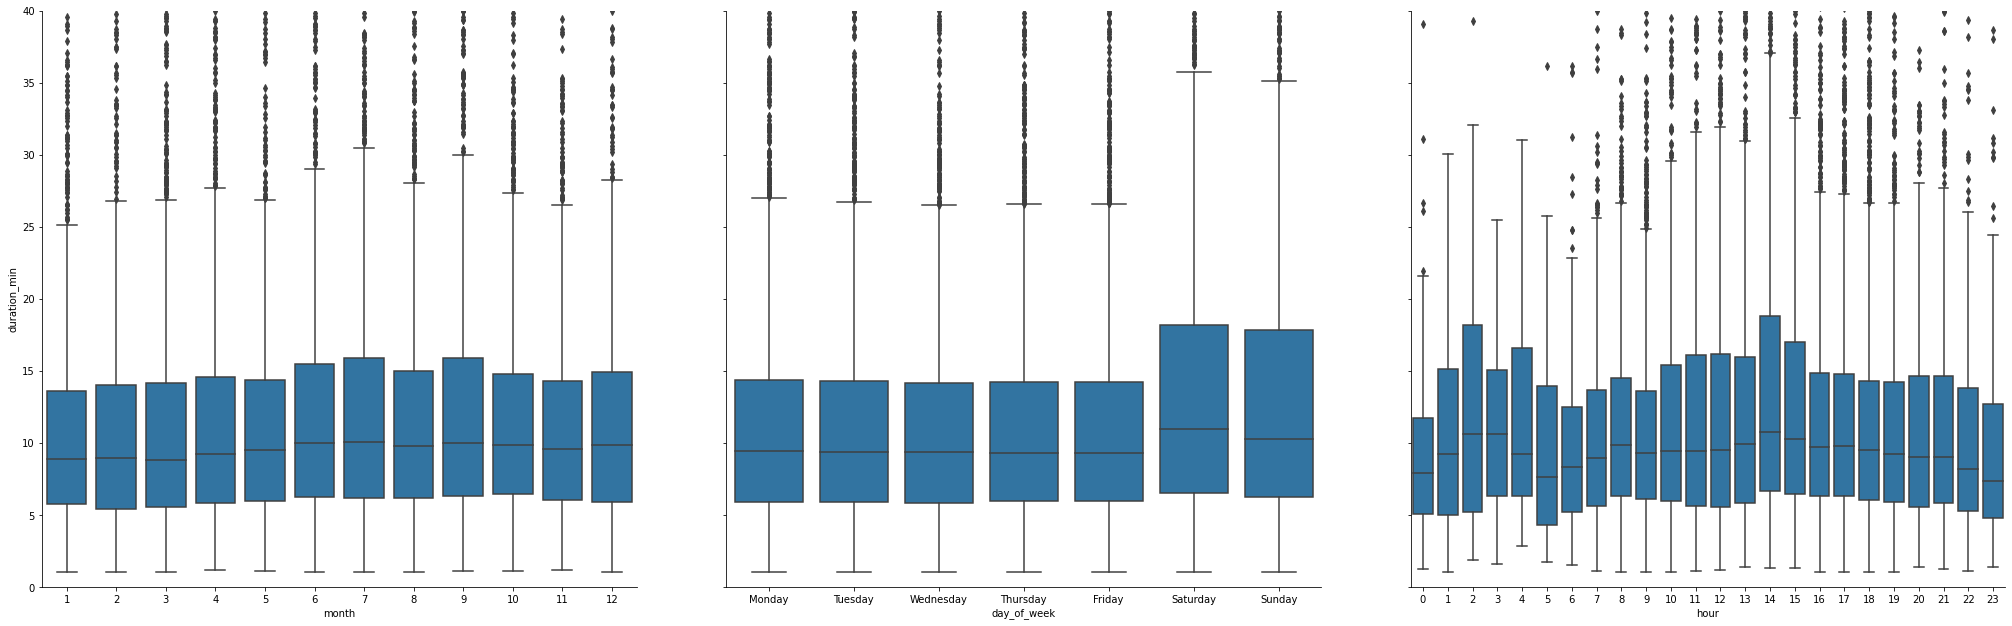

In [21]:
def boxgrid(x,y, **kwargs):
    default_color=sns.color_palette()[0]
    sns.boxplot(x,y, color=default_color)

plt.figure(figsize=[10,10])
g = sns.PairGrid(data=df_samp, 
                 y_vars=['duration_min'],
                 x_vars=['month','day_of_week','hour'])
g.map(boxgrid)
g.fig.set_size_inches(30,10)
plt.ylim(0,40);

Seeing the box plot of day_of_week, and also considering the bar chart from the previous section, it is safe to say the variation within weekday and weekend are not significant compare to the difference between weekday and weekend.  Thus I have decided to change the entries in day_of_week to either weekday or weekend.

In [22]:
# define funciton to return weekday or weekend depending on the dayofweek value (0-4:Mon-Fri,5-6: sat-sun)
def day_of_week(time):
    day = time.dayofweek
    if day < 5:
        return 'Weekday'
    else:
        return 'Weekend'
df['day_of_week']=df.loc[:,'start_time'].apply(lambda x: day_of_week(x))

dow_class = ['Weekday','Weekend']
dow_category = pd.api.types.CategoricalDtype(ordered = True,
                                            categories = dow_class)
df['day_of_week'] = df['day_of_week'].astype(dow_category)

In [23]:
# retake the sample again as I changed the day_of_week entries
samples = np.random.choice(df.shape[0], 25000, replace = False) #1% of population
df_samp = df.loc[samples,:]

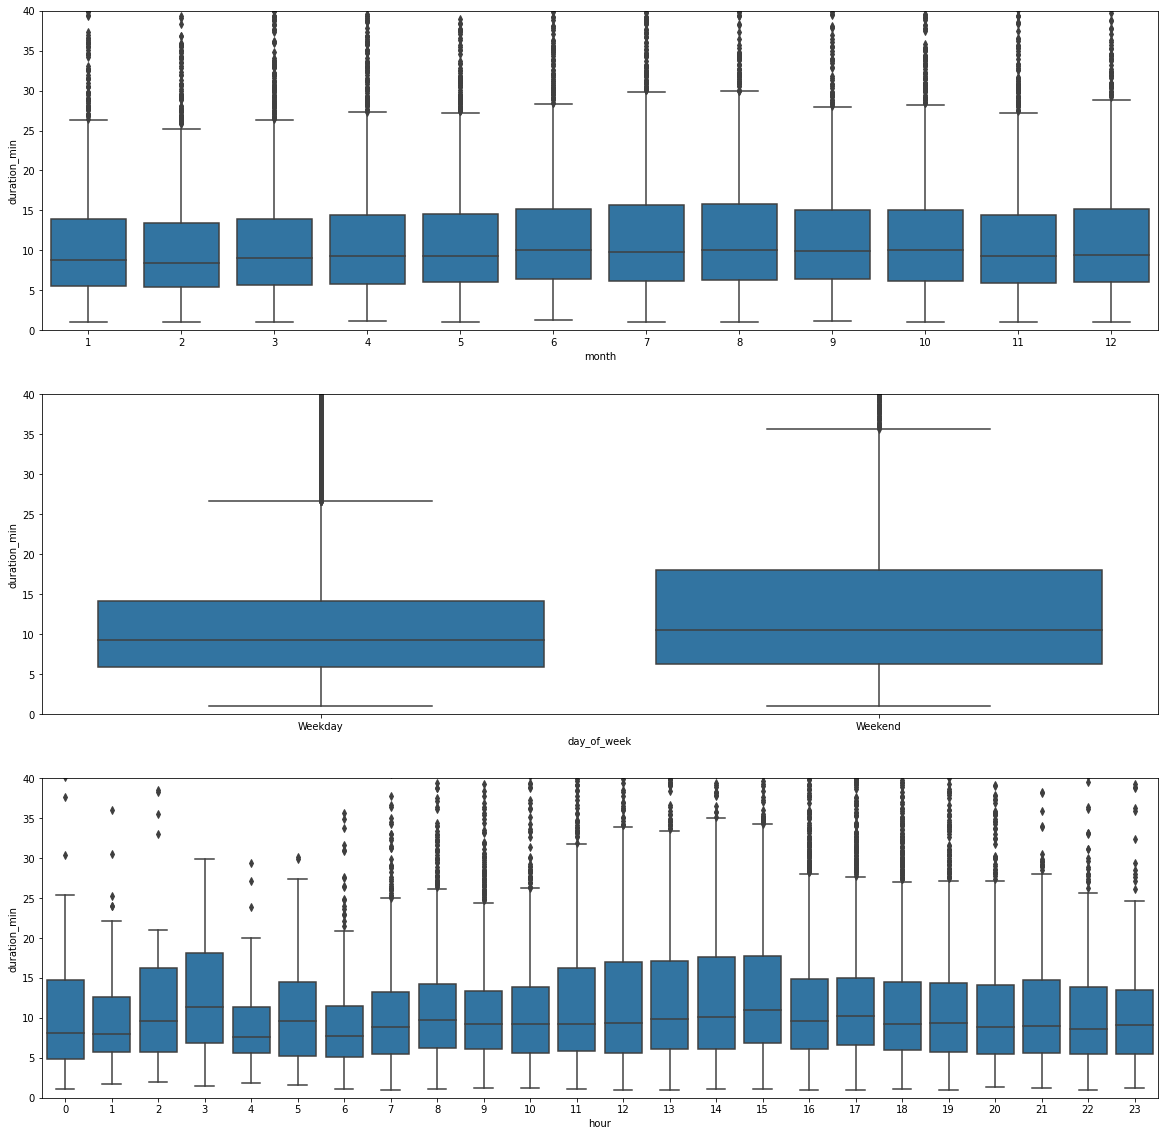

In [24]:
time_val = ['month','day_of_week','hour']
fig, ax = plt.subplots(nrows=3, figsize=(20,20), sharey=True)
for i in range(len(time_val)):
    sns.boxplot(data=df_samp, x=time_val[i], y='duration_min', color=base_color, ax=ax[i])
    plt.ylim(0,40)

The duration of the ride seems to increase very slightly towards summer.  The difference is more visible when the day of the week is compared.  There is a 2-3min difference in mean, and 75% quartile is almost 5min longer.  The dependence varies, and there is a small increase at 3 am. 

Lets look into how different user_type affect the average ride duration

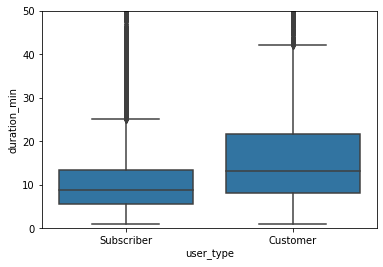

In [25]:
sns.boxplot(data=df_samp, x='user_type', y='duration_min', color=base_color)
plt.ylim(0,50);

The difference is noticeable.  Subscribers have much shorter ride duration and much more concentrated around 10mins long.  On the other hand, the customer tends to ride longer and more skewed towards the longer rides

Now compare how the number of rides differs over time depending on the user_type

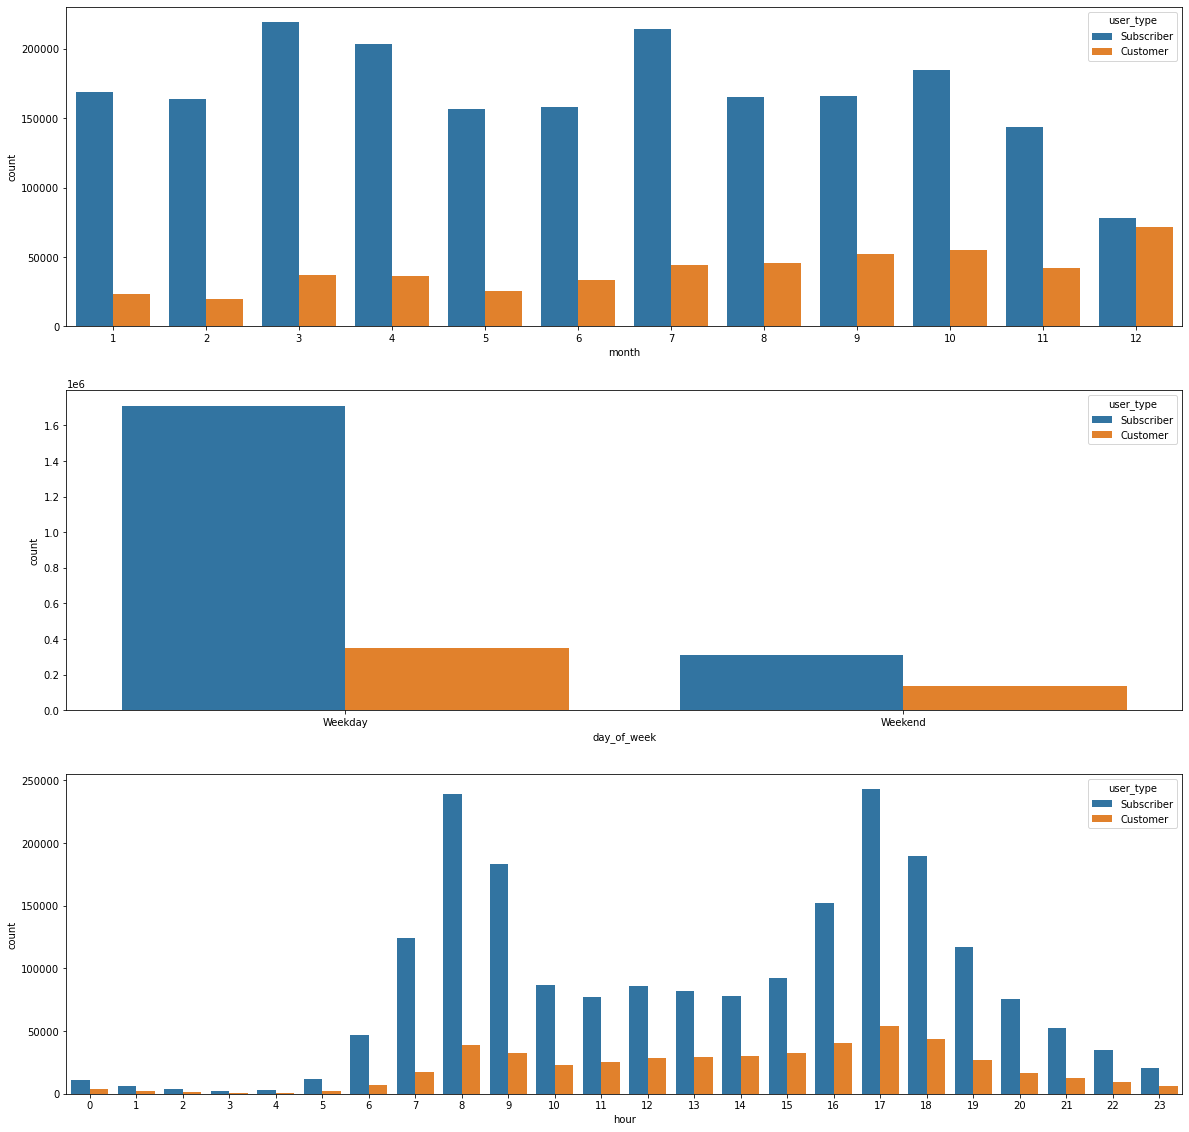

In [26]:
time_val = ['month','day_of_week','hour']
fig, ax = plt.subplots(nrows=3, figsize=(20,20))
for i in range(3):
    sns.countplot(data=df, x=time_val[i], hue='user_type', ax=ax[i])

The monthly figure shows that peaks in March, July and October are led mainly by an increase in subscriber.  The customer figure fluctuates but has an increasing trend towards the end of the year.  
The second and third plots exemplify the primary user are subscribers who use bikes for commuting.  The distribution of hourly usage is bimodal with peaks around 8 and 17, and the trend is the same for both subscribers and customers. 

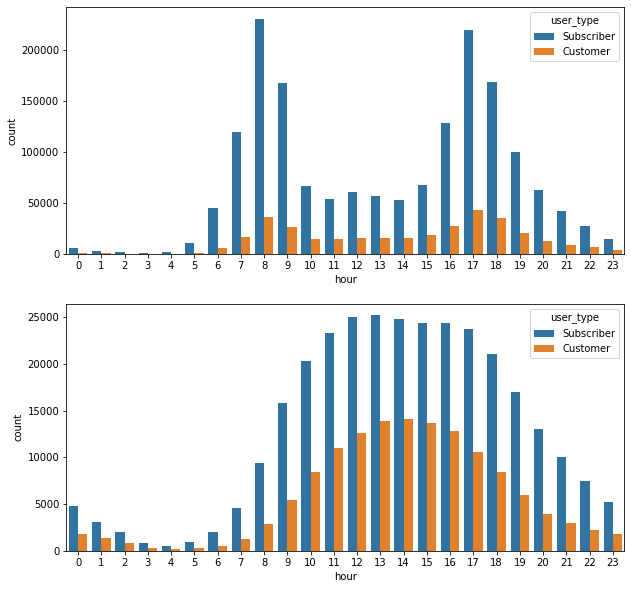

In [27]:
# since the trend on weekeday and weekend seem to differ, lets see how the hourly usage change on these separate occasions. 
fig, ax = plt.subplots(nrows=2, figsize=(10,10))
sns.countplot(data=df[df['day_of_week']=='Weekday'], x='hour', hue='user_type', ax=ax[0])
sns.countplot(data=df[df['day_of_week']=='Weekend'], x='hour', hue='user_type', ax=ax[1]);

These plots show the very different natures of how bikes are used.  During the weekday, users use bikes for commuting, with peaks around 8 and 17.  During the weekend, there is one broad peak around early afternoon.  Their trend is the same regardless of customer type.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The duration of rides are affected mainly by two factors.  The first factor is the time of the week, and the second is the type of customer.  When rides are made during the week, or by subscribers, the average duration is shorter than those of rides made during weekends or customers.  


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Number of rides have also been affected by the factors mentioned above but also by the hour.  The pattern is clear.  During the weekday, most of the rides are made by subscribers.  On the other hand, during the weekend, the ratio of subscriber and customer becomes much closer.  Also, the hourly number of ride shift drastically during the weekend.  Weekday has bimodal peaks in the morning and early evening, but on the weekend there is one broad peak in the early afternoon.  There is no difference in this trend weather the users are subscribers or customers. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

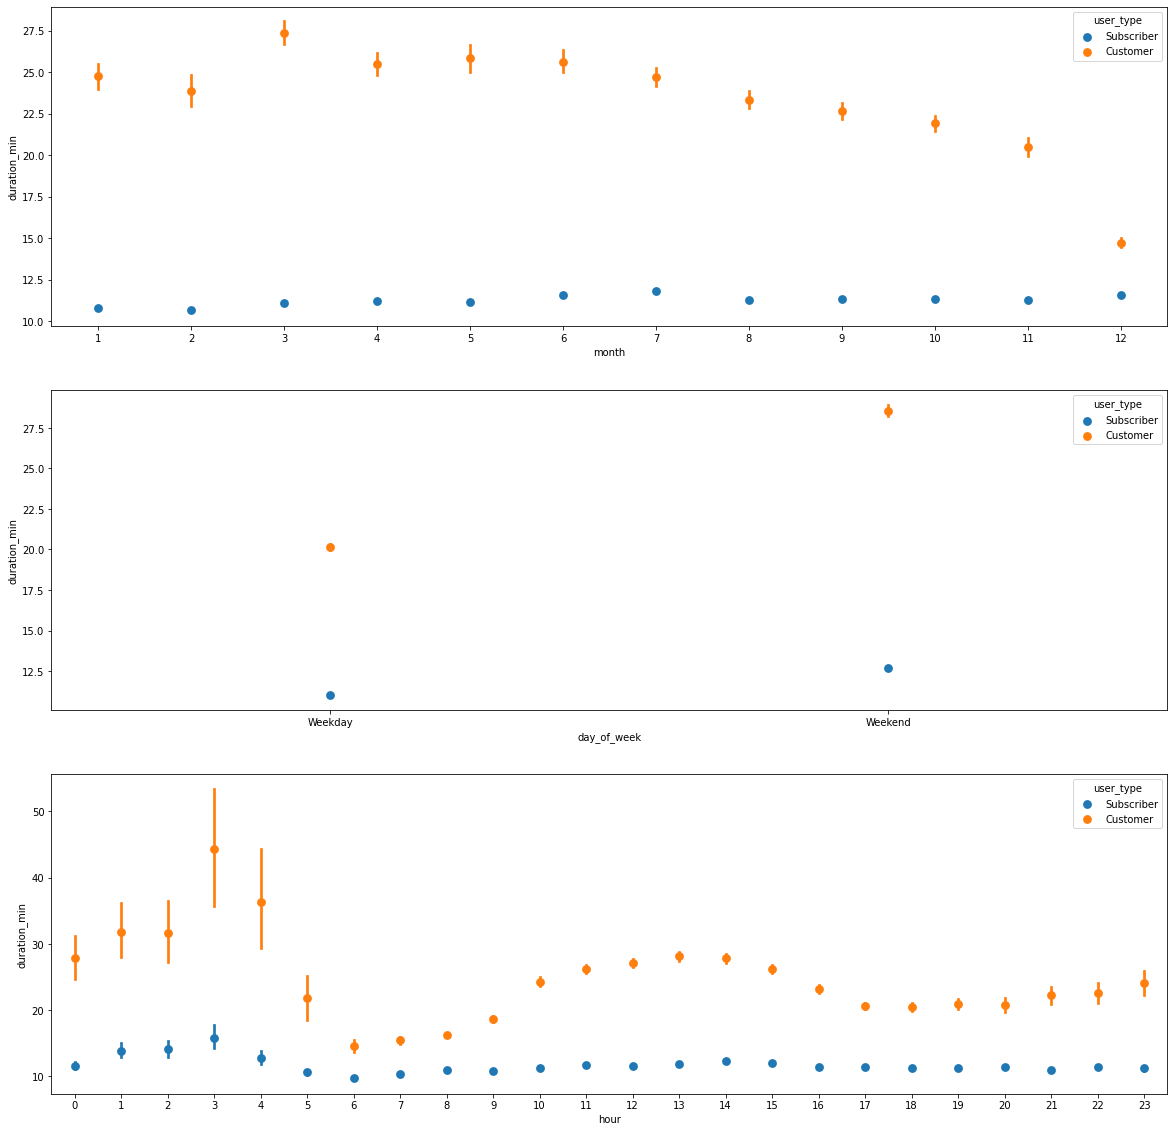

In [28]:
time_val = ['month','day_of_week','hour']
base_color = sns.color_palette()[0]
fig, ax = plt.subplots(nrows=3, figsize=(20,20))
for i in range(3):
    sns.pointplot(data=df, x=time_val[i], y='duration_min',hue='user_type', ax=ax[i], linestyles='')

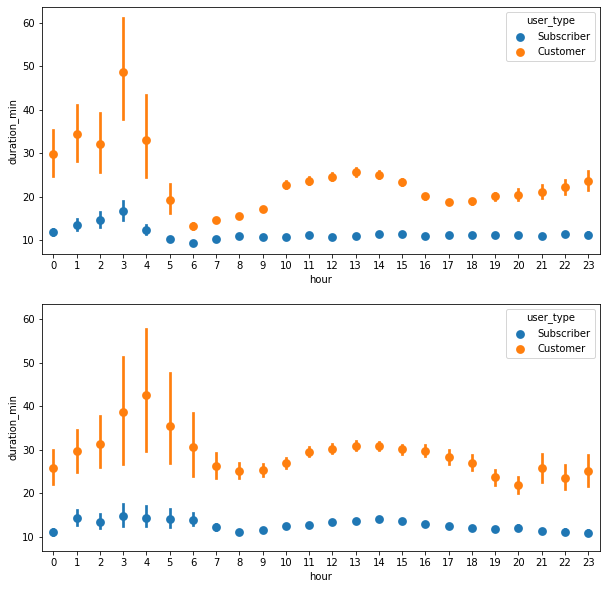

In [29]:
fig, ax = plt.subplots(nrows=2, figsize=(10,10), sharey=True)
sns.pointplot(data=df[df['day_of_week']=='Weekday'], x='hour',y='duration_min', hue='user_type', ax=ax[0], linestyles='')
sns.pointplot(data=df[df['day_of_week']=='Weekend'], x='hour', y='duration_min', hue='user_type', ax=ax[1], linestyles='')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There are a few noticeable trends that can be extracted from these plots.  Customer type users have longer average duration time than the subscribers.  It is also clear that there is little variation to the average time for subscribers, while considerable fluctuation can be observed for customers.  Looking at the change through months, the average duration steadily decreases towards December.  If I were to assume there are periodical pattern, then there would be a massive jump between December to January.  It would be interesting to investigate data from different year further to see if the pattern is the same.  
The average duration increased for both user types during the weekend, although the difference is more significant in customers.
The duration change over the course of the day shows that the subscribers have consistently shorter ride duration.  There is a slight increase late at night, but also the fractures quite a lot.  
### Were there any interesting or surprising interactions between features?

> The nature of rides can be categorised into four groups with different combinations of day_of_week and user_type.  The difference between these are stark, and any further investigation will need to be carried with this in mind.